In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Importing the world population Dataset --->

In [60]:
df =pd.read_csv('world_population.csv')

checking first 5 values --->

In [61]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


Shape of the Dataset

In [62]:
print(f"No of Rows {df.shape[0]}")
print(f"No of Columns {df.shape[1]}")

No of Rows 234
No of Columns 17


#### Checking Missing Values 

hence there are no missing & null values 

In [63]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

#### Checking the Data types

Hence Data types are correct and accurate 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

#### Checking Data Inconsitency

All columns in the dataset are correctly organised and data values are consistence

In [65]:
df['CCA3'].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COK',
       'CRI', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA',
       'DOM', 'COD', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP',
       'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR',
       'ITA', 'CIV', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR',
       'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE',
       'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT',
       'MHL', 'MTQ',

In [66]:
df['Country/Territory'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'DR Congo', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Islands',
       'Faroe Islands', 'Fiji', 'Finland', 'France', '

In [67]:
df['Capital'].unique()

array(['Kabul', 'Tirana', 'Algiers', 'Pago Pago', 'Andorra la Vella',
       'Luanda', 'The Valley', 'Saint John’s', 'Buenos Aires', 'Yerevan',
       'Oranjestad', 'Canberra', 'Vienna', 'Baku', 'Nassau', 'Manama',
       'Dhaka', 'Bridgetown', 'Minsk', 'Brussels', 'Belmopan',
       'Porto-Novo', 'Hamilton', 'Thimphu', 'Sucre', 'Sarajevo',
       'Gaborone', 'Brasilia', 'Road Town', 'Bandar Seri Begawan',
       'Sofia', 'Ouagadougou', 'Bujumbura', 'Phnom Penh', 'Yaounde',
       'Ottawa', 'Praia', 'George Town', 'Bangui', "N'Djamena",
       'Santiago', 'Beijing', 'Bogota', 'Moroni', 'Avarua', 'San José',
       'Zagreb', 'Havana', 'Willemstad', 'Nicosia', 'Prague',
       'Copenhagen', 'Djibouti', 'Roseau', 'Santo Domingo', 'Kinshasa',
       'Quito', 'Cairo', 'San Salvador', 'Malabo', 'Asmara', 'Tallinn',
       'Mbabane', 'Addis Ababa', 'Stanley', 'Tórshavn', 'Suva',
       'Helsinki', 'Paris', 'Cayenne', 'Papeete', 'Libreville', 'Banjul',
       'Tbilisi', 'Berlin', 'Accra', 'Gib

In [68]:
df['Continent'].value_counts()

Continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: count, dtype: int64

#### Checking the Duplicate Values in the Dataset

Hence we can see that there are no duplicate record in the dataset

In [69]:
df.duplicated().sum()

0

### Treating Outliers :

In [70]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

Checking Outliers with the Box Plot --->

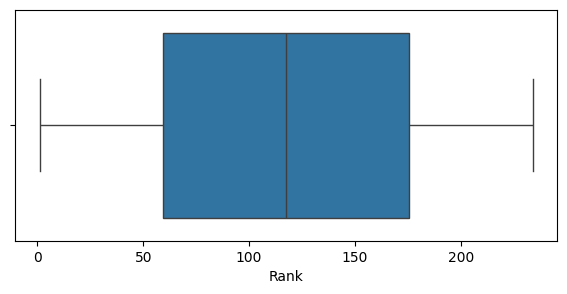

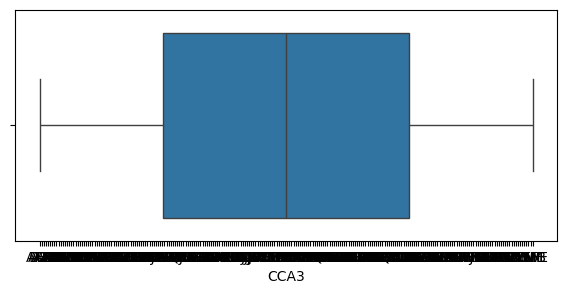

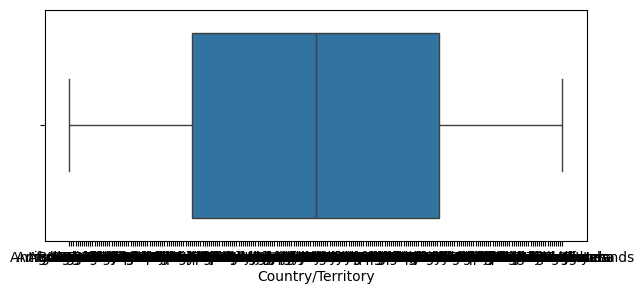

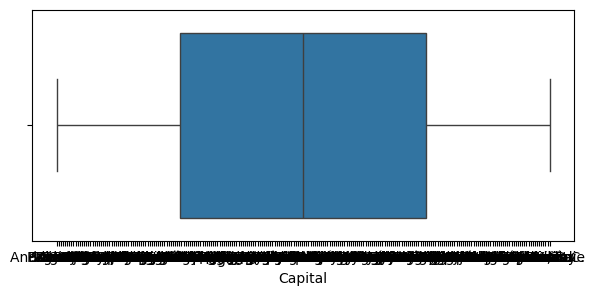

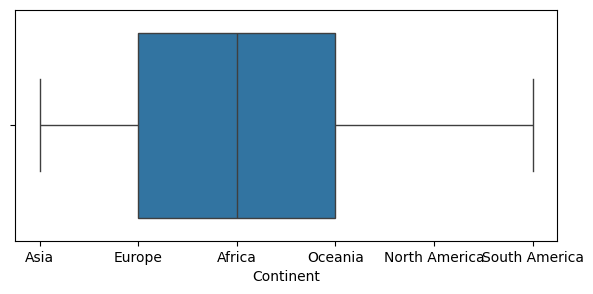

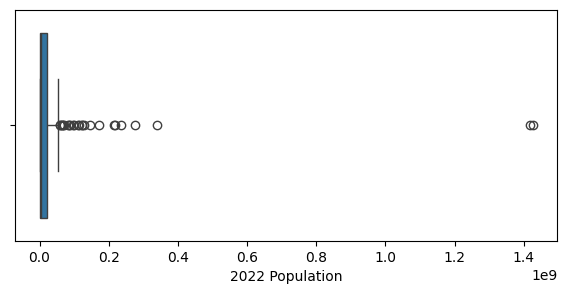

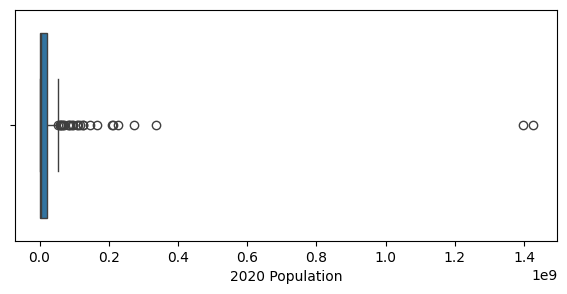

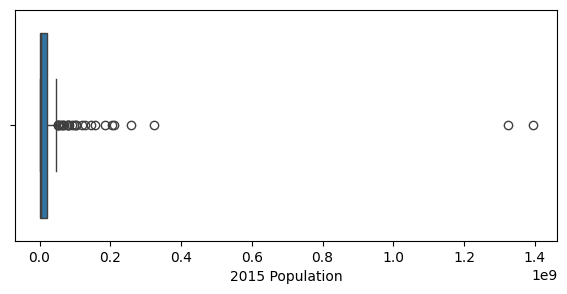

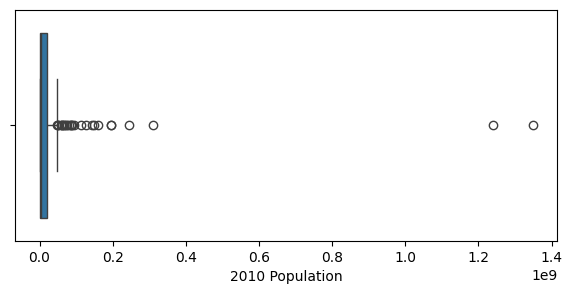

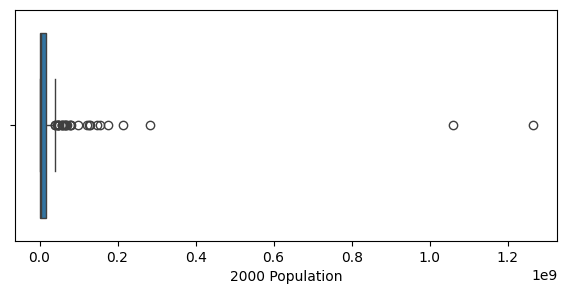

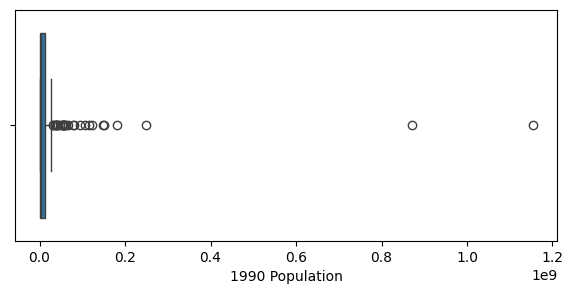

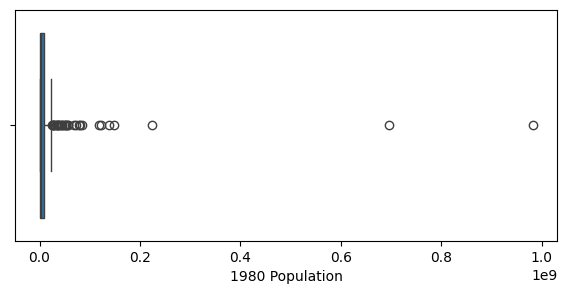

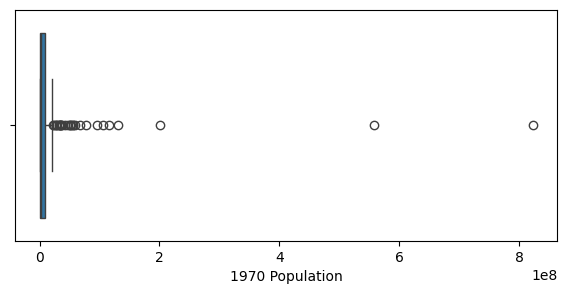

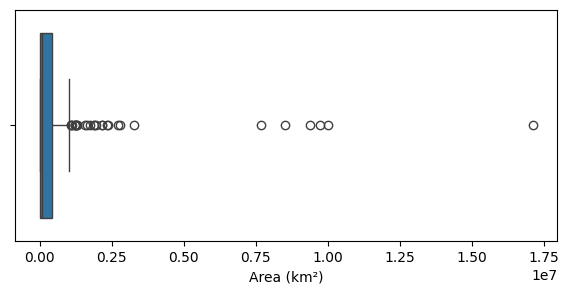

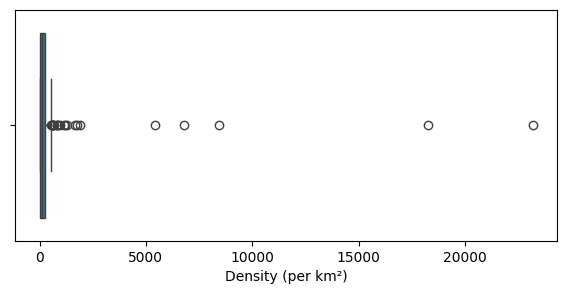

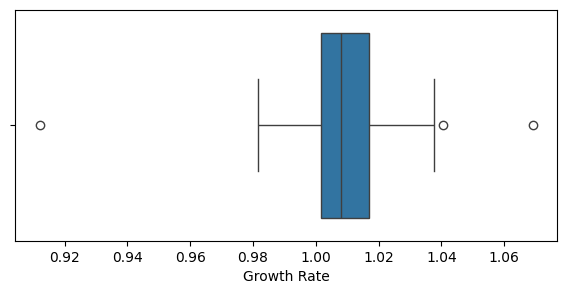

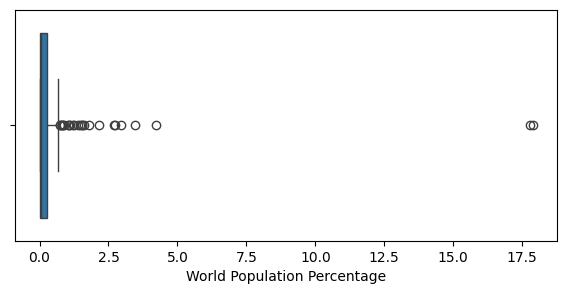

In [71]:
# sns.boxplot(df['Rank'])
for i in df:
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=df,x=i)
    plt.show()

Here we can that the all numerical columns in the dataset has outliers which is not good for ML Model training and ML Algorithms

In [72]:
numer = df.select_dtypes(exclude=object)

Removing the outliers by iterating the columns by busing the IQR Method --->

In [73]:
for cols in numer.columns:
        q1 = df[cols].quantile(0.25)
        q3 = df[cols].quantile(0.75)

        IQR = q3 - q1

        Lower_limit = q1 - 1.5 * IQR
        Upper_limit = q3 + 1.5 * IQR
        df[cols] = df[cols].clip(Lower_limit,Upper_limit)

Hence we can see following that the outliers has successfully removed --->

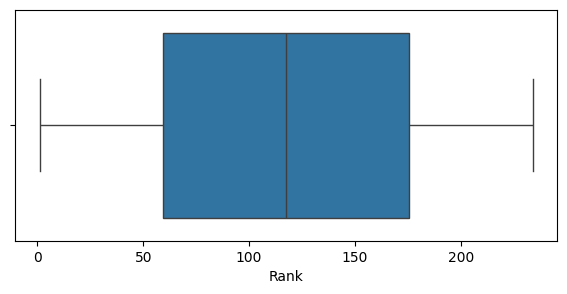

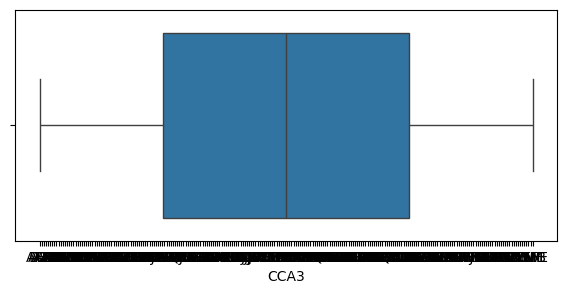

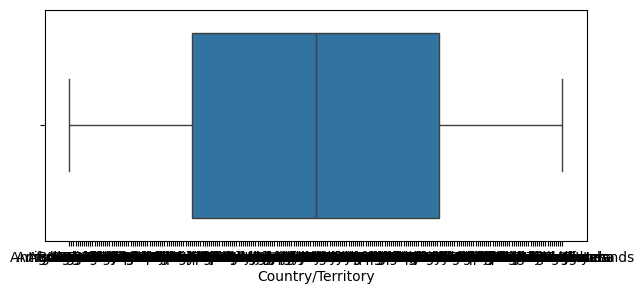

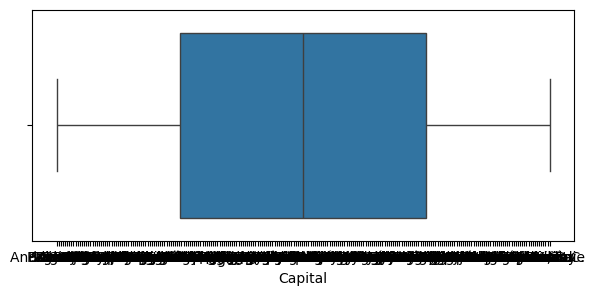

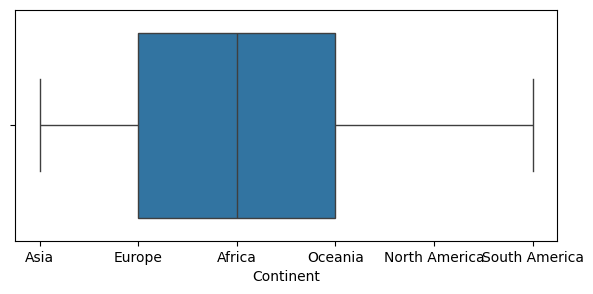

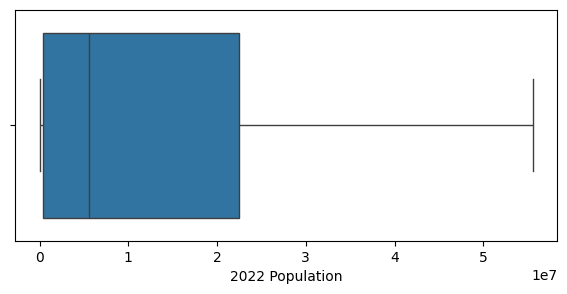

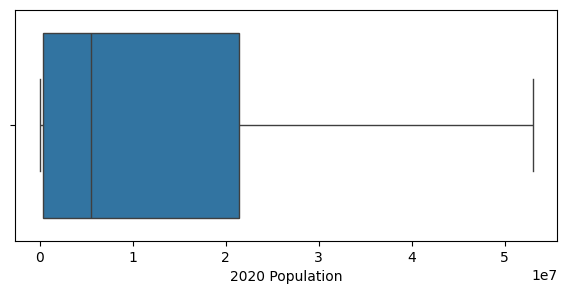

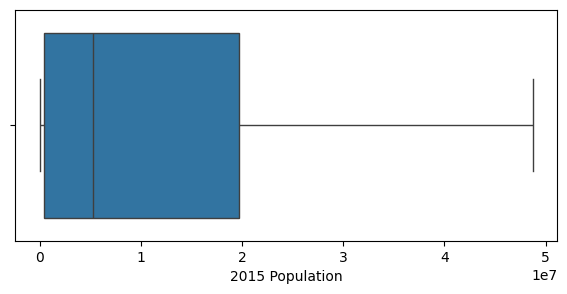

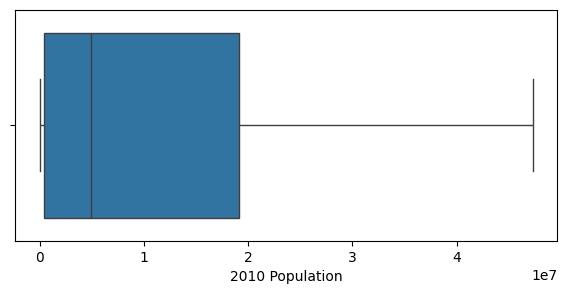

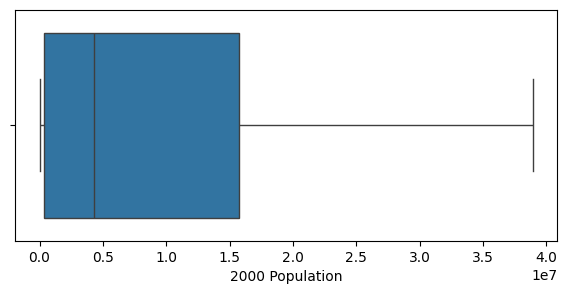

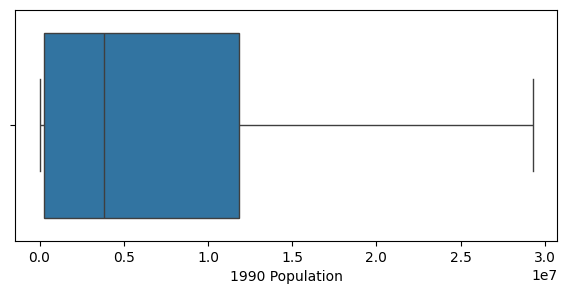

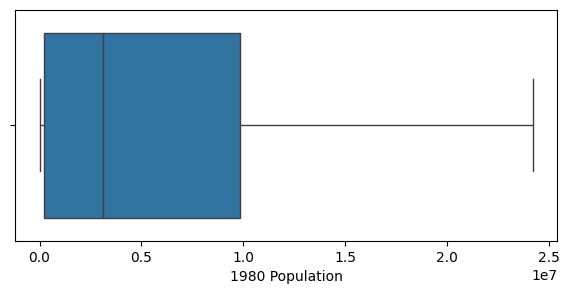

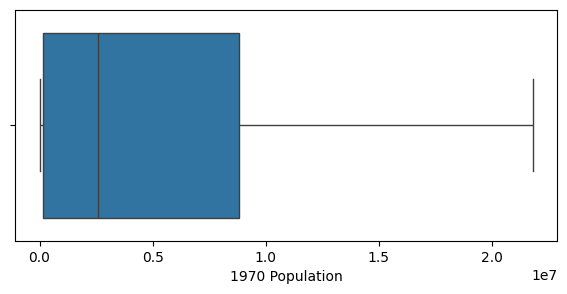

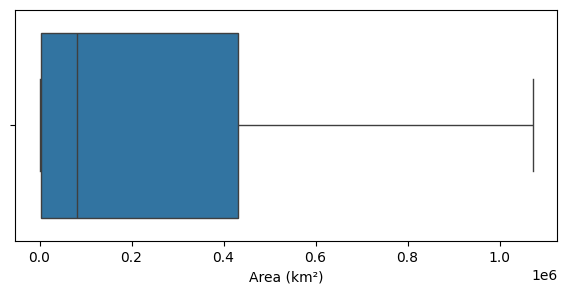

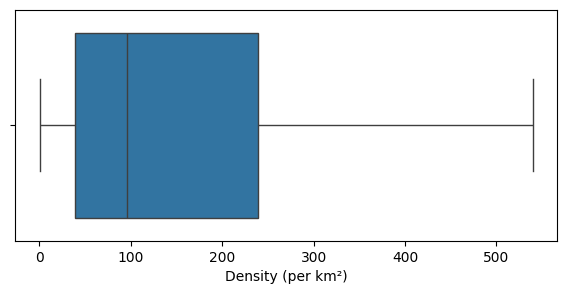

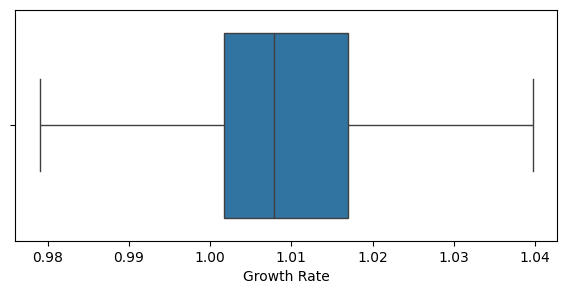

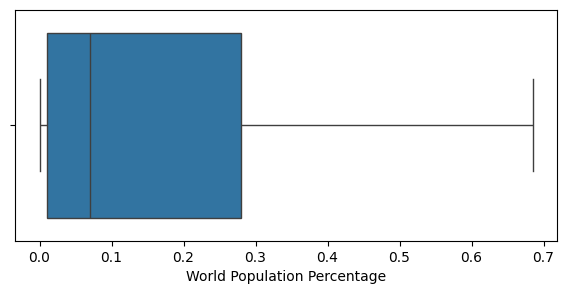

In [74]:
for i in df:
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=df,x=i)
    plt.show()

In [75]:
df.shape

(234, 17)

### Exploratory Data Analysis

Checking basic Statistics mean mode medians unique values 

In [76]:
df.describe(include='all')

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,234,234,234,234,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
unique,NaN,234,234,234,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AFG,Afghanistan,Kabul,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,117.500000,NaN,NaN,NaN,NaN,1.485435e+07,1.434831e+07,1.325587e+07,1.251144e+07,1.043102e+07,8.303216e+06,6.843893e+06,5.840868e+06,2.746004e+05,165.967140,1.009735,0.184808
std,67.694165,NaN,NaN,NaN,NaN,1.903058e+07,1.827776e+07,1.680888e+07,1.610291e+07,1.332163e+07,1.018616e+07,8.398356e+06,7.407402e+06,3.713518e+05,170.716019,0.011436,0.236160
min,1.000000,NaN,NaN,NaN,NaN,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.979013,0.000000
25%,59.250000,NaN,NaN,NaN,NaN,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,NaN,NaN,NaN,NaN,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,NaN,NaN,NaN,NaN,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000


In [77]:
numerical = df.select_dtypes(exclude=object)
catogorical = df.select_dtypes(include=object)

In [78]:
correlation_metrix = numerical.corr()

In [79]:
correlation_metrix

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.876626,-0.878161,-0.878085,-0.869813,-0.866278,-0.872836,-0.863995,-0.841456,-0.669616,0.227295,-0.294902,-0.878471
2022 Population,-0.876626,1.000000,0.999598,0.997497,0.993423,0.983290,0.968591,0.954256,0.936714,0.698841,-0.124834,0.180872,0.999882
2020 Population,-0.878161,0.999598,1.000000,0.998866,0.995267,0.986108,0.972261,0.958241,0.940846,0.697842,-0.125300,0.170435,0.999628
2015 Population,-0.878085,0.997497,0.998866,1.000000,0.998258,0.991873,0.979957,0.967285,0.951335,0.691883,-0.122427,0.149611,0.997540
2010 Population,-0.869813,0.993423,0.995267,0.998258,1.000000,0.996316,0.985572,0.974871,0.962327,0.680888,-0.114152,0.125414,0.993196
2000 Population,-0.866278,0.983290,0.986108,0.991873,0.996316,1.000000,0.995045,0.988076,0.978382,0.668290,-0.111764,0.097777,0.983060
1990 Population,-0.872836,0.968591,0.972261,0.979957,0.985572,0.995045,1.000000,0.996320,0.986667,0.661941,-0.118312,0.080109,0.968571
1980 Population,-0.863995,0.954256,0.958241,0.967285,0.974871,0.988076,0.996320,1.000000,0.995586,0.645951,-0.113018,0.052804,0.954136
1970 Population,-0.841456,0.936714,0.940846,0.951335,0.962327,0.978382,0.986667,0.995586,1.000000,0.622029,-0.098208,0.015243,0.936106
Area (km²),-0.669616,0.698841,0.697842,0.691883,0.680888,0.668290,0.661941,0.645951,0.622029,1.000000,-0.413833,0.281199,0.699412


#### Checking Correlation of columns each other vise versa 1.00 very high postive correlation, 0.25 meanse medium postive correlation , 0.75 negative correlation

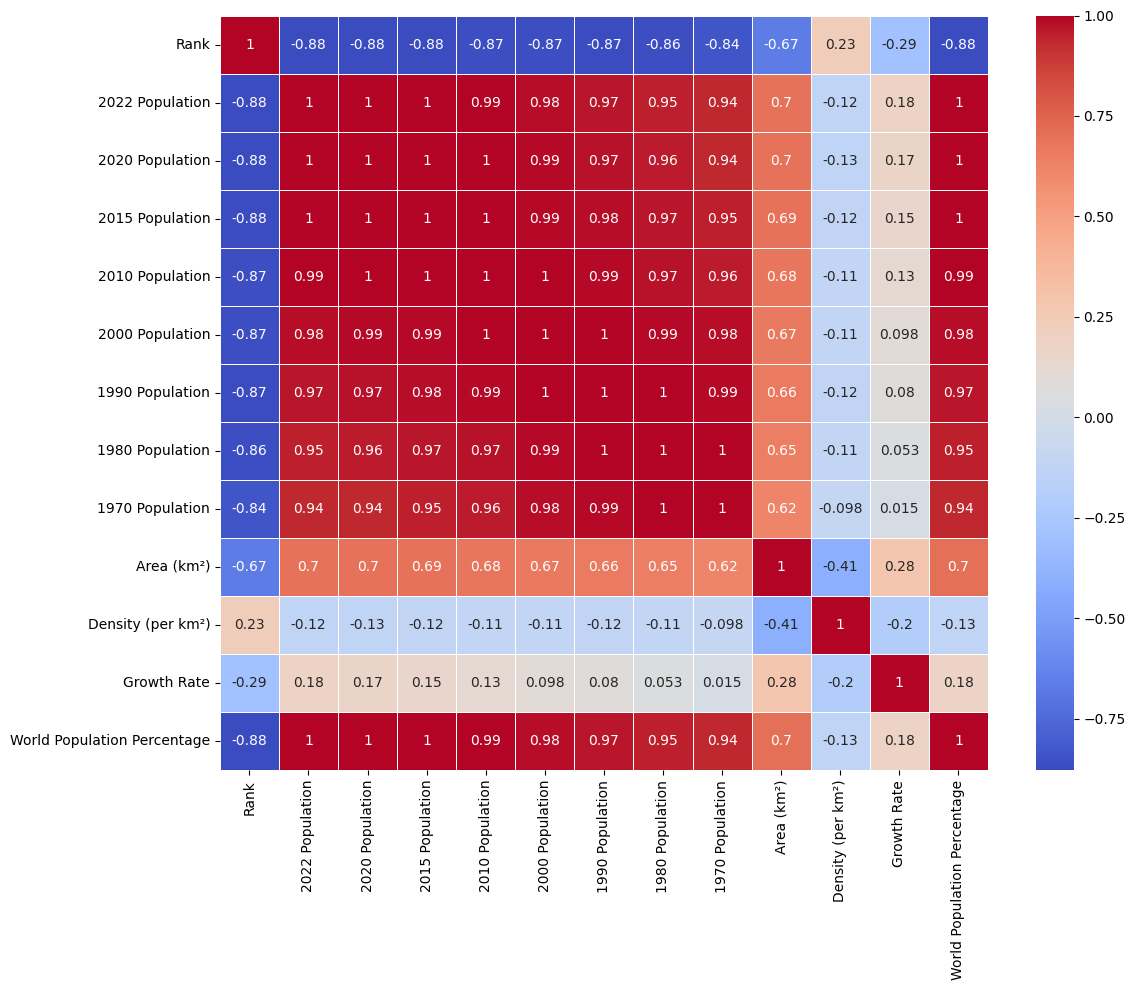

In [80]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_metrix,annot=True, cmap='coolwarm', linewidths=0.5)
plt.tight_layout()
plt.show()

C:\Users\sudar\AppData\Local\Temp\ipykernel_12208\854905956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Continent',y='Rank',palette='viridis')


<Axes: xlabel='Continent', ylabel='Rank'>

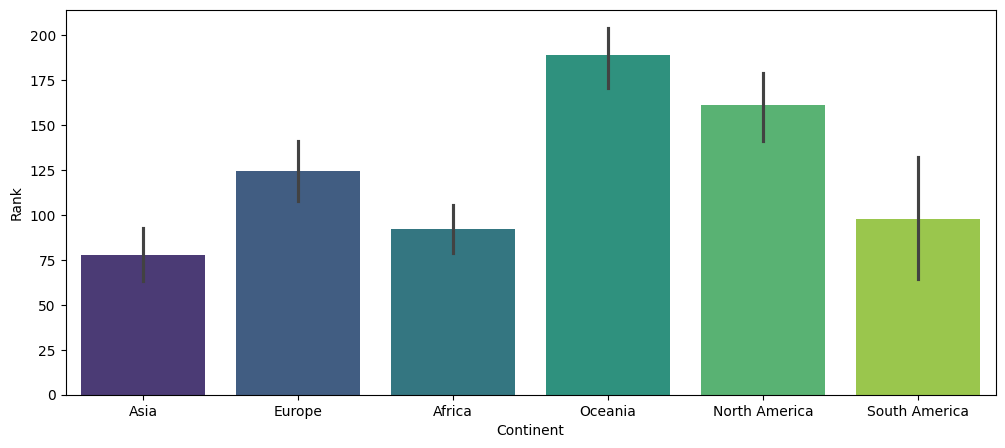

In [81]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df,x='Continent',y='Rank',palette='viridis')

In [82]:
df.columns = df.columns.str.strip()

### Dealing With The Skewed Data ---->

Here we can see that the most of the columns are right skewed data which is not normally distributed and not goog for ML model

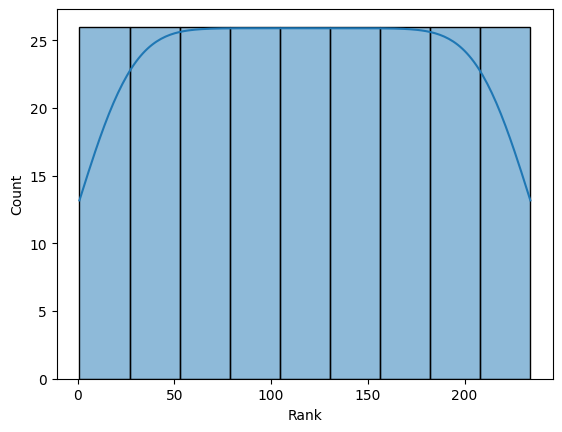

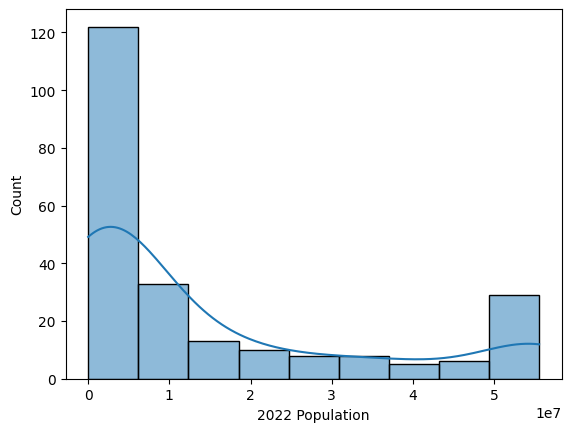

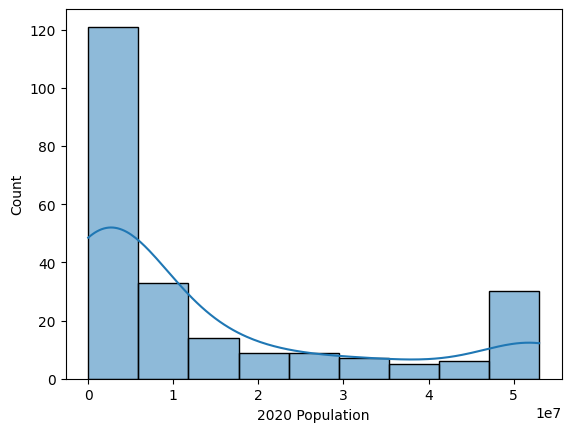

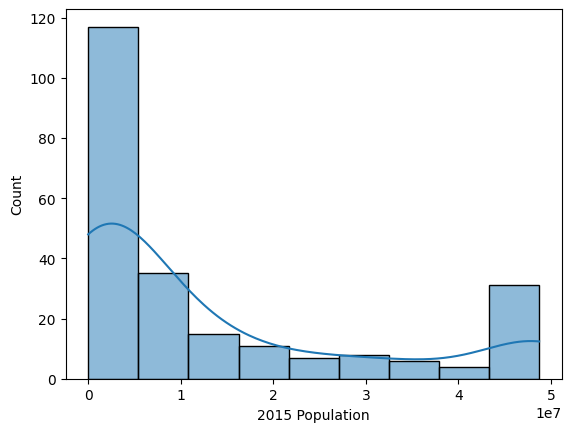

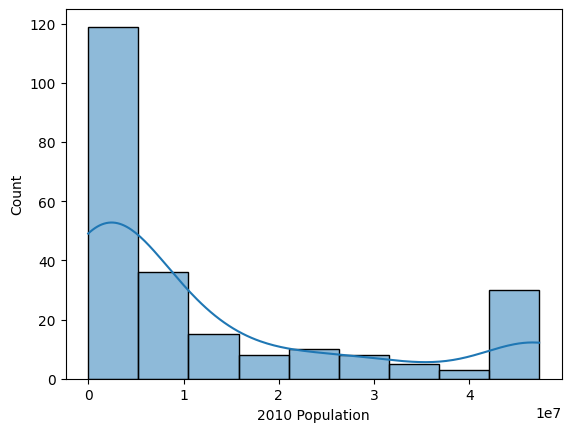

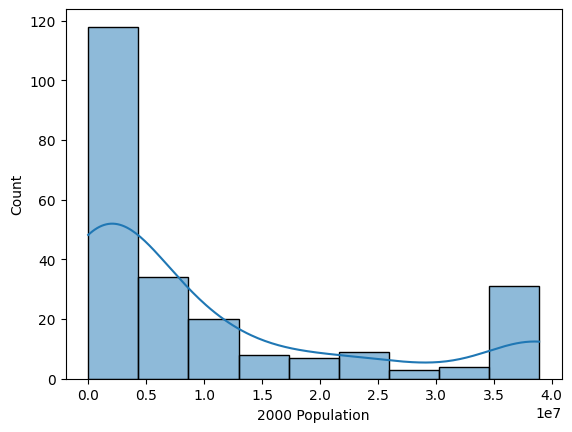

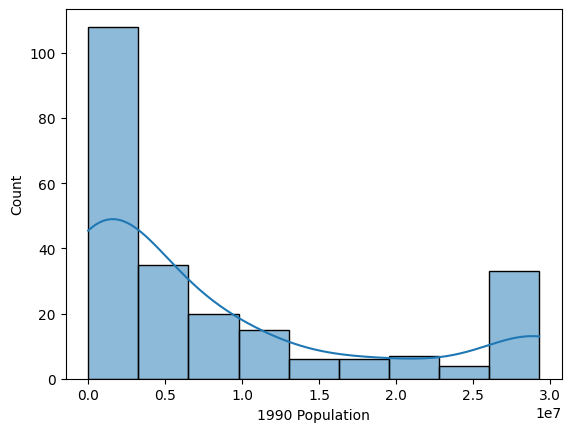

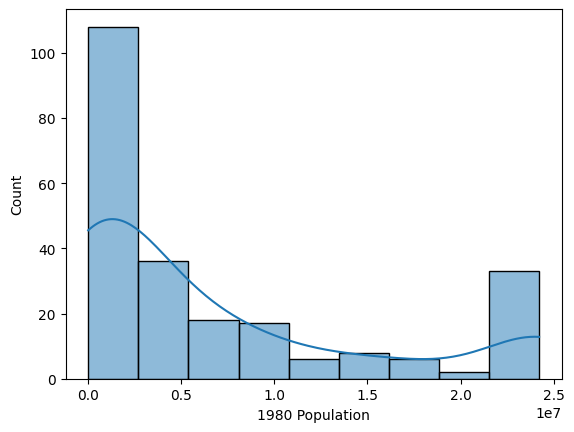

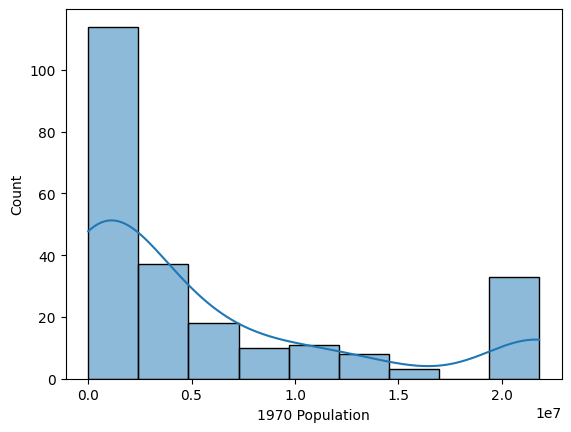

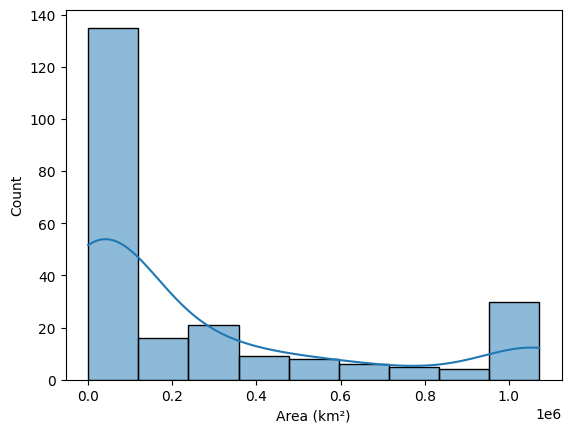

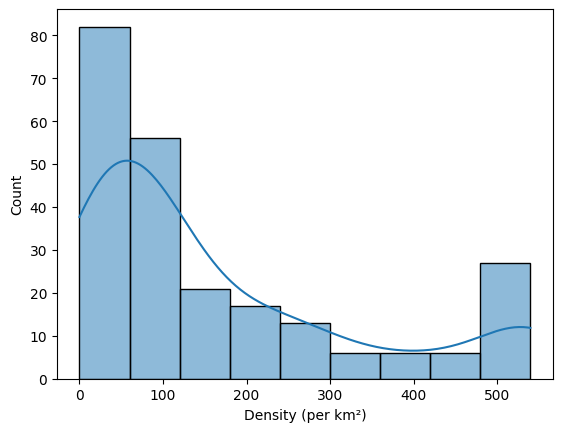

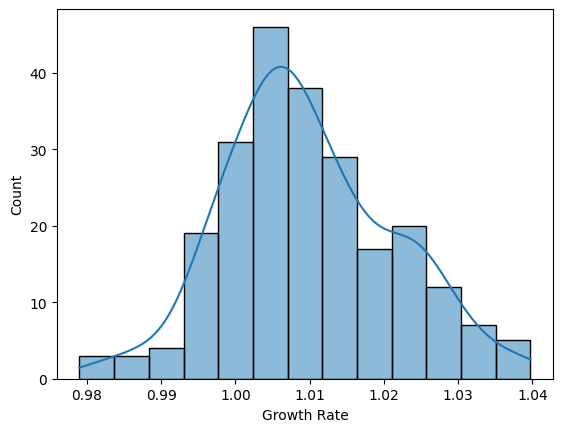

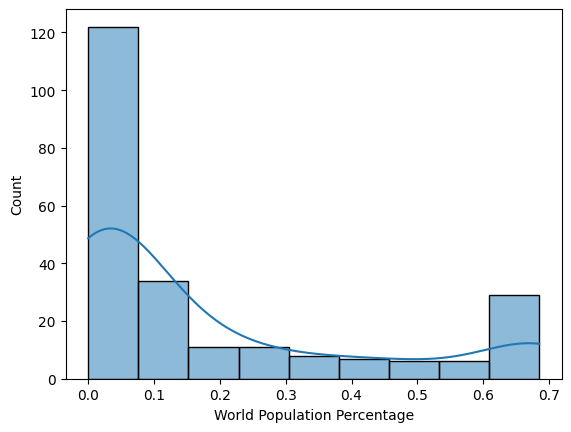

In [83]:
for cols in numerical.columns:
    sns.histplot(df[cols],kde=True)
    plt.show()

following we use square root transformation by using numpy for making columns normally distributed

In [84]:
columns_to_transform = [
    '2022 Population', '2020 Population', '2015 Population',
    '2010 Population', '2000 Population', '1990 Population',
    '1980 Population', '1970 Population', 'Area (km²)','Density (per km²)',
    'World Population Percentage'
]

for cols in columns_to_transform:
    # df[cols] = np.sqrt(df[cols])
    df[cols] = np.log1p(df[cols])

now all numerical columns are  normally distributed but not more effective but it gives ML algorithms R2 score better

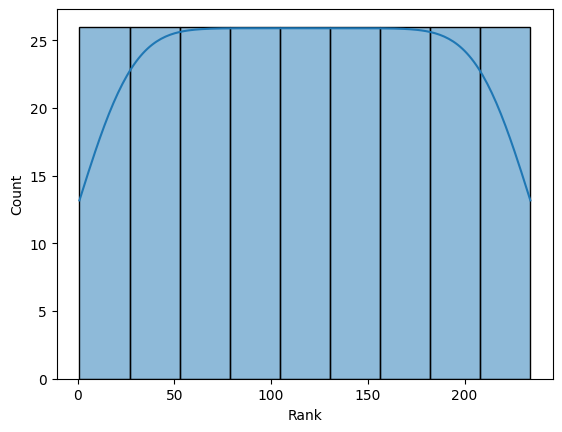

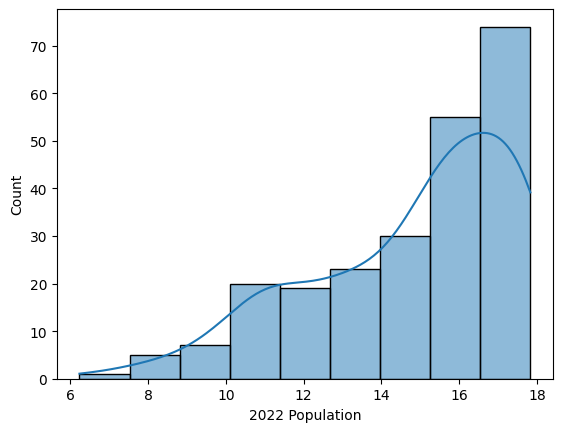

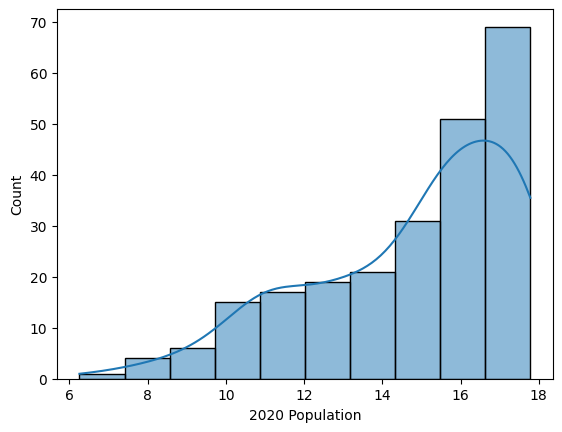

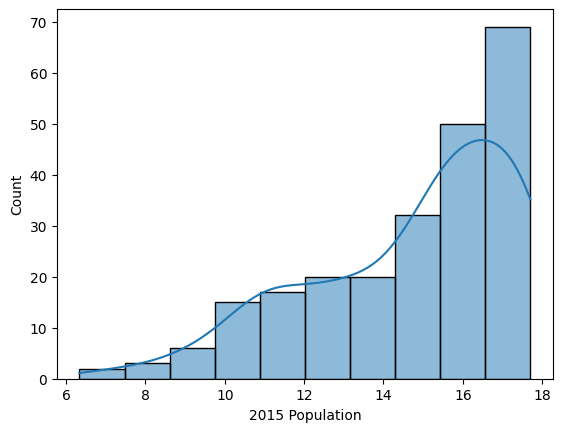

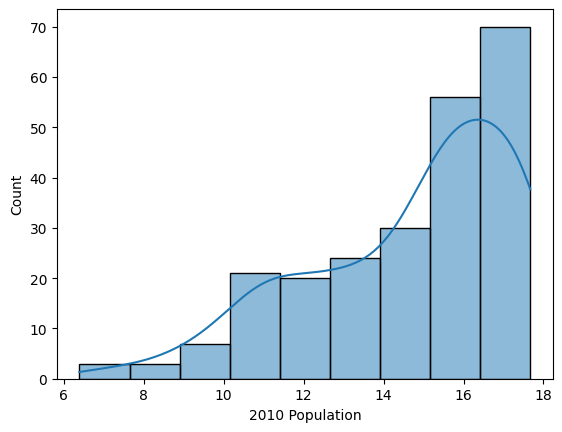

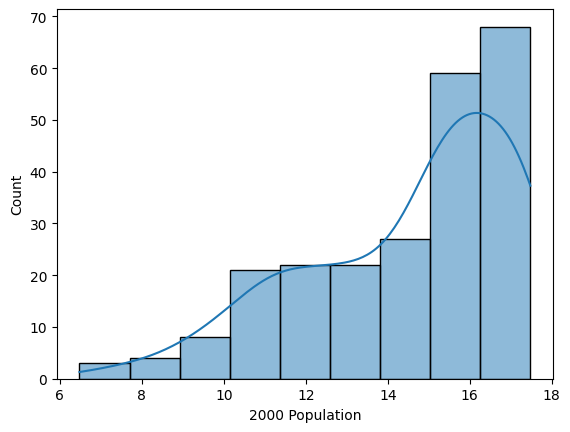

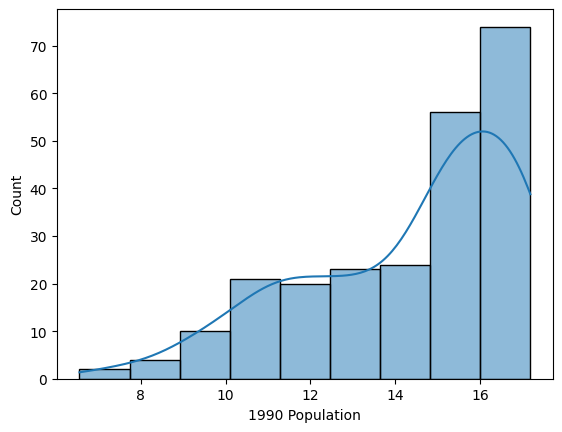

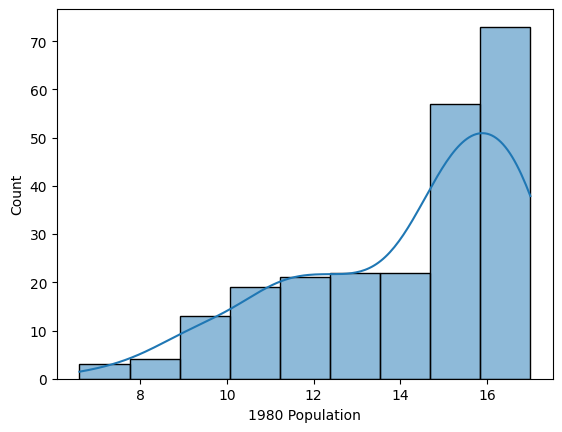

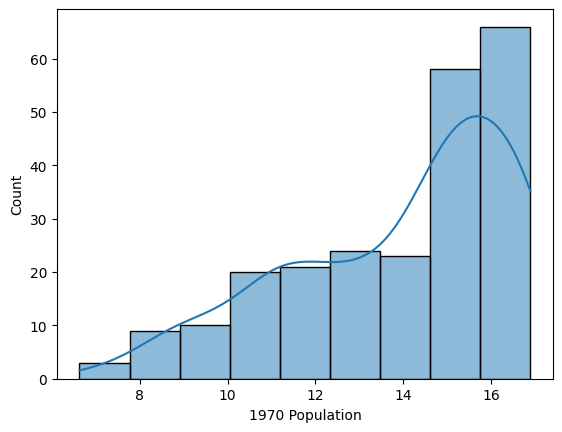

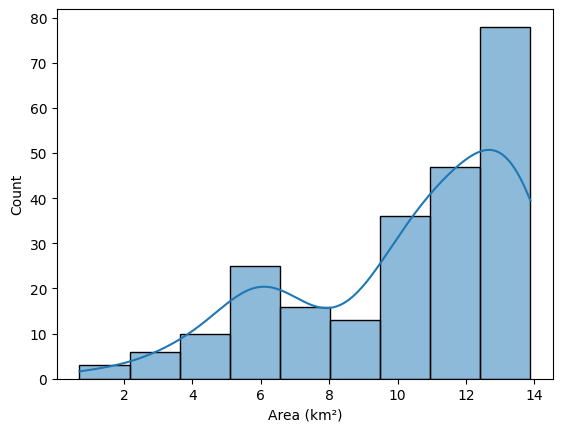

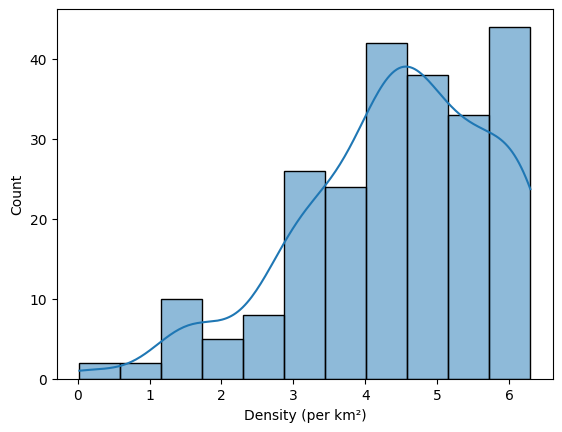

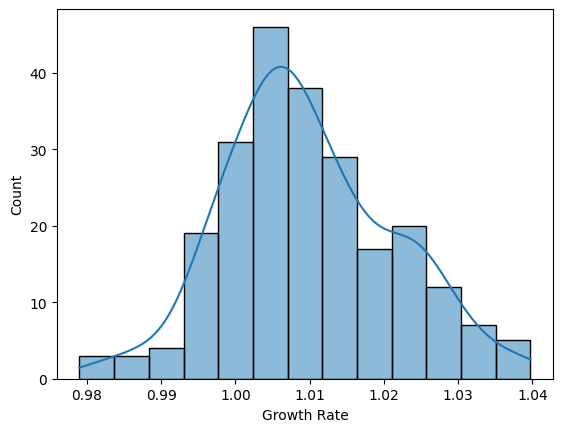

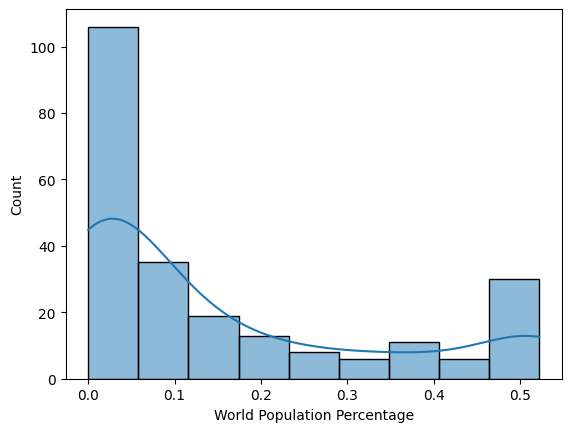

In [85]:
for cols in numerical.columns:
    sns.histplot(df[cols],kde=True)
    plt.show()

In [86]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,17.532218,17.478360,17.334595,17.154466,16.788127,16.185268,16.340169,16.190693,13.388154,4.159800,1.0257,0.418710
1,138,ALB,Albania,Tirana,Europe,14.860132,14.868724,14.874162,14.884831,14.973027,15.007937,14.894482,14.659115,10.266358,4.603871,0.9957,0.039221
2,34,DZA,Algeria,Algiers,Africa,17.620020,17.587160,17.492903,17.395031,17.242201,17.054898,16.746138,16.439883,13.885121,2.988360,1.0164,0.444686
3,213,ASM,American Samoa,Pago Pago,Oceania,10.698153,10.740519,10.846790,10.912357,10.972173,10.775178,10.400833,10.206403,5.298317,5.409310,0.9831,0.000000
4,203,AND,Andorra,Andorra la Vella,Europe,11.287592,11.260623,11.180901,11.177732,11.098894,10.888744,10.480438,9.896513,6.150603,5.144957,1.0100,0.000000


### Machine Learning Algorithms --->

Feture Encoding and Feture Scalling are done by Pipline with Column Tranfer

in X variable all fetures and y variable target column which we are going to predict Growth Rate

In [87]:
X = df.drop(columns=['Growth Rate'])
y = df['Growth Rate']

In [88]:
cat = ['CCA3', 'Country/Territory', 'Capital', 'Continent']
num = ['Rank', '2022 Population', '2020 Population', '2015 Population','2010 Population', '2000 Population', '1990 Population','1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)','World Population Percentage']

### Train Test Split -->

80% Trainig 20% Testing 

In [89]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### LinearRegression

In [90]:
Preprocessing = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat)
])

model = Pipeline([
    ('Preprocessor',Preprocessing),
    ('Regression',LinearRegression())
])

Trainig the model

In [91]:
model.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rank', '2022 Population',
                                                   '2020 Population',
                                                   '2015 Population',
                                                   '2010 Population',
                                                   '2000 Population',
                                                   '1990 Population',
                                                   '1980 Population',
                                                   '1970 Population',
                                                   'Area (km²)',
                                                   'Density (per km²)',
                                                   'World Population '
                                                   'Percentage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CCA3', 'Country/Territory',
                                                   'Capital', 'Continent'])])),
                ('Regression', LinearRegression())])

Machine predicted values -->

In [92]:
y_predict = model.predict(x_test)

Actual Values vs Machine Predicted Values

In [118]:
df_ap = pd.DataFrame({'Actual Values':y_test,'Predicted':y_predict})
df_ap.head()

,Actual Values,Predicted
69,1.0239,1.010352
206,1.0013,1.008247
180,0.9975,1.001222
9,0.9962,1.004230
127,0.9965,1.001240


Calculating Mean Squared Error

In [93]:
mse_Lr =mean_squared_error(y_test,y_predict)

Calculating R2 Score

In [94]:
Lr = r2_score(y_test,y_predict)*100

### XGBRegressor

In [95]:
Preprocessing2 = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat)
])

model2 = Pipeline([
    ('Preprocessor',Preprocessing2),
    ('Regression',XGBRegressor())
])

In [96]:
model2.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rank', '2022 Population',
                                                   '2020 Population',
                                                   '2015 Population',
                                                   '2010 Population',
                                                   '2000 Population',
                                                   '1990 Population',
                                                   '1980 Population',
                                                   '1970 Population',
                                                   'Area (km²)',
                                                   'Density (per km²)',
                                                   'World Population '
                                                   'Percentage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CCA3', 'C...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [97]:
y_predict2 = model2.predict(x_test)

In [98]:
mse_Xb = mean_squared_error(y_test,y_predict2)

In [99]:
Xb = r2_score(y_test,y_predict2)*100

### RandomForestRegressor

In [100]:
Preprocessing3 = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat)
])

model3 = Pipeline([
    ('Preprocessor',Preprocessing3),
    ('Regression',RandomForestRegressor())
])

In [101]:
model3.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rank', '2022 Population',
                                                   '2020 Population',
                                                   '2015 Population',
                                                   '2010 Population',
                                                   '2000 Population',
                                                   '1990 Population',
                                                   '1980 Population',
                                                   '1970 Population',
                                                   'Area (km²)',
                                                   'Density (per km²)',
                                                   'World Population '
                                                   'Percentage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CCA3', 'Country/Territory',
                                                   'Capital', 'Continent'])])),
                ('Regression', RandomForestRegressor())])

In [102]:
y_predict3 = model3.predict(x_test)

In [103]:
mse_Rf = mean_squared_error(y_test,y_predict3)

In [104]:
Rf = r2_score(y_test,y_predict3)*100

### Support Vector Machine

In [105]:
Preprocessing4 = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat)
])

model4 = Pipeline([
    ('Preprocessor',Preprocessing4),
    ('Regression',SVR(kernel='rbf'))
])

In [106]:
model4.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rank', '2022 Population',
                                                   '2020 Population',
                                                   '2015 Population',
                                                   '2010 Population',
                                                   '2000 Population',
                                                   '1990 Population',
                                                   '1980 Population',
                                                   '1970 Population',
                                                   'Area (km²)',
                                                   'Density (per km²)',
                                                   'World Population '
                                                   'Percentage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CCA3', 'Country/Territory',
                                                   'Capital', 'Continent'])])),
                ('Regression', SVR())])

In [107]:
y_predict4 = model4.predict(x_test)

In [108]:
mse_Svr = mean_squared_error(y_test,y_predict4)

In [109]:
Svr = r2_score(y_test,y_predict4)*100

### KNeighborsRegressor

In [110]:
Preprocessing5 = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat)
])

model5 = Pipeline([
    ('Preprocessor',Preprocessing5),
    ('Regression',KNeighborsRegressor())
])

In [111]:
model5.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rank', '2022 Population',
                                                   '2020 Population',
                                                   '2015 Population',
                                                   '2010 Population',
                                                   '2000 Population',
                                                   '1990 Population',
                                                   '1980 Population',
                                                   '1970 Population',
                                                   'Area (km²)',
                                                   'Density (per km²)',
                                                   'World Population '
                                                   'Percentage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CCA3', 'Country/Territory',
                                                   'Capital', 'Continent'])])),
                ('Regression', KNeighborsRegressor())])

In [112]:
y_predict5 = model5.predict(x_test)

In [113]:
mse_kn = mean_squared_error(y_test,y_predict5)

In [114]:
Kn = r2_score(y_test,y_predict5)*100

#### Conclusion

In [115]:
print(f"mean squared error of linear regression {mse_Lr}")
print(f"mean squared error of XGBRegressor {mse_Xb}")
print(f"mean squared error of RandomForestRegressor {mse_Rf}")
print(f"mean squared error of SVR {mse_Svr}")
print(f"mean squared error of KNeighborsRegressor {mse_kn}")

mean squared error of linear regression 8.975548924447974e-05
mean squared error of XGBRegressor 0.0001090561170976025
mean squared error of RandomForestRegressor 9.926998077327313e-05
mean squared error of SVR 0.00015526770611702098
mean squared error of KNeighborsRegressor 0.0001126573558510628


In [116]:
print(f"R2 score of Linear Regression {Lr}")
print(f"R2 score of XGBRegressor {Xb}")
print(f"R2 score of RandomForestRegressor {Rf}")
print(f"R2 score of SVR {Svr}")
print(f"R2 score of KNeighborsRegressor {Kn}")

R2 score of Linear Regression 42.1887320042386
R2 score of XGBRegressor 29.75724977740687
R2 score of RandomForestRegressor 36.06047373007064
R2 score of SVR -0.0075097910547938795
R2 score of KNeighborsRegressor 27.43770163115442


linear regression algorithm gives highest R2 score 42% 

remaing are near 27% and 36% 